<a href="https://colab.research.google.com/github/saadam1n/CS4803-EML/blob/main/lab0/lab0_task1_Saad_Amin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pleas read:

before your start running this jupyter notebook, please click Edit > Notebook Settings and choose any of the available GPUs.

## 0. Import Python Packages

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

## TODO: you may import more packages below:
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import tqdm

import matplotlib.pyplot as plt

## 1. Define your first network

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)

        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.25)

        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)


    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)

        return output

## 2. Implement training loop and test function

In [14]:
def train(model, device, train_loader, optimizer, epoch):
    # TODO: finish this function, you are required to:
    # 1. implement model forward pass, backward pass and parameter update;
    # 2. return the training loss every 100 training steps;

    model.to(device)
    model.train()

    loss_curve = []
    traing_step = 0

    for epoch_idx in tqdm.tqdm(range(epoch)):
        for input, labels in train_loader:
            input = input.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            logits = model(input)

            loss = F.nll_loss(logits, labels)
            loss.backward()

            optimizer.step()

            if traing_step % 100 == 0:
              loss_curve.append(loss.item())

              print(f"{traing_step}:\t{loss.item()}")

            traing_step += 1


    return model, loss_curve

def test(model, device, test_loader):
    # TODO: finish this function, you are required to:
    # 1. print the loss and classification accuracy on the test set
    pass

## 3. Dataset loading


In [4]:
# TODO: finish the code here, you are required to:
# 1. load the training and testing split of the MNIST dataset

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.60MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 129kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.23MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.47MB/s]


## 4. Put Everything Together

  0%|          | 0/1 [00:00<?, ?it/s]

0:	2.304810047149658
100:	0.22326424717903137
200:	0.1526433676481247
300:	0.12828922271728516
400:	0.17233923077583313
500:	0.04979928582906723
600:	0.06607051193714142
700:	0.05268791690468788
800:	0.043950289487838745
900:	0.0752221941947937


100%|██████████| 1/1 [00:14<00:00, 14.77s/it]


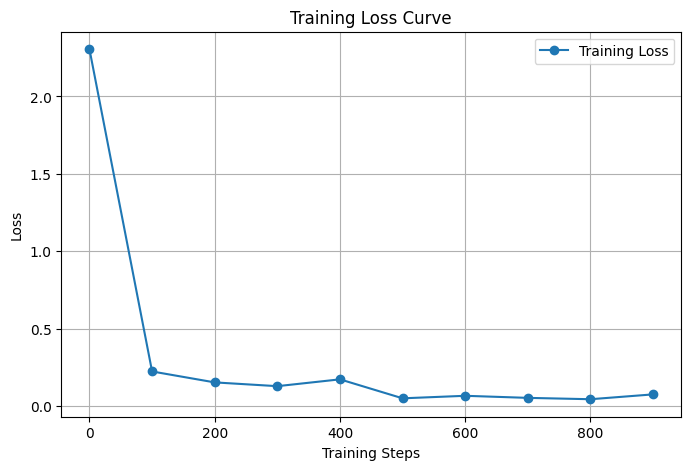

In [17]:
# TODO: finish the code here, you are required to:
# 1. launch model training: recommended hyperparameter: batch size = 64, learning rate = 1.0, adam optimizer
# 2. visualize the training loss curve using matplotlib or any other libraries
model = Net()

optimizer = optim.Adam(model.parameters(), lr = 0.001)
model, losses = train(model, torch.device("cuda"), train_loader, optimizer, 1)

steps = [i * 100 for i in range(len(losses))]

plt.figure(figsize=(8, 5))
plt.plot(steps, losses, marker='o', label="Training Loss")

plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid(True)
plt.show()